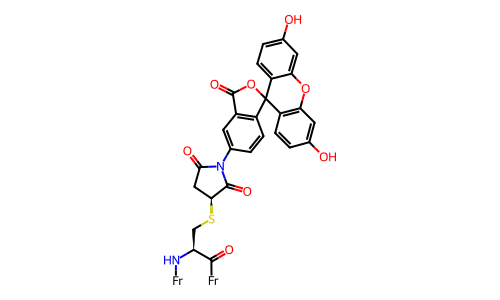

In [1]:
from openff.toolkit import Molecule, Topology

# Make unnatural AA as its own mol. Since a residue is a substructure, not a valid molecule,
# use something that's easy to recognize as a "cap". Here I use Fr since it makes one bond,
# we're super unlikely to see Fr anywhere else, and Sage doesn't support it, so if
# we make a mistake and it gets left behind we'll eventually get an error.
substructure_mol = Molecule.from_smiles(
    "C1=CC2=C(C=C1N3C(=O)C[C@H](SC[C@H](N[Fr])C(=O)[Fr])C3=O)C(=O)O[C@]24C5=C(C=C(C=C5)O)OC6=C4C=CC(=C6)O"
)
substructure_mol.visualize(show_all_hydrogens=False)

In [7]:
substructure_mol.to_smiles(mapped=True)

'[c:1]1([H:41])[c:2]([H:42])[c:3]2[c:4]([c:5]([H:43])[c:6]1[N:7]1[C:8](=[O:9])[C:10]([H:44])([H:45])[C@@:11]([S:12][C:13]([C@:14]([N:15]([Fr:16])[H:50])([C:17](=[O:18])[Fr:19])[H:49])([H:47])[H:48])([H:46])[C:20]1=[O:21])[C:22](=[O:23])[O:24][C:25]21[c:26]2[c:27]([c:28]([H:51])[c:29]([O:32][H:54])[c:30]([H:52])[c:31]2[H:53])[O:33][c:34]2[c:35]1[c:36]([H:55])[c:37]([H:56])[c:38]([O:40][H:58])[c:39]2[H:57]'

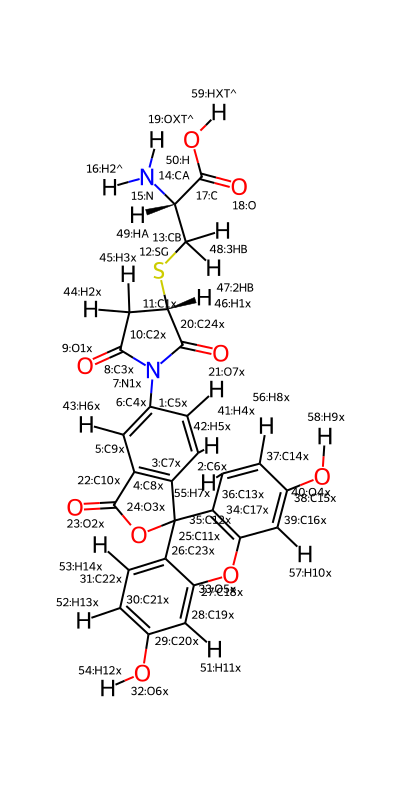

In [35]:
from utils import draw_molecule

smiles = "[c:1]1([H:41])[c:2]([H:42])[c:3]2[c:4]([c:5]([H:43])[c:6]1[N:7]1[C:8](=[O:9])[C:10]([H:44])([H:45])[C@@:11]([S:12][C:13]([C@:14]([N:15]([H:16])[H:50])([C:17](=[O:18])[O:19][H:59])[H:49])([H:47])[H:48])([H:46])[C:20]1=[O:21])[C:22](=[O:23])[O:24][C:25]21[c:26]2[c:27]([c:28]([H:51])[c:29]([O:32][H:54])[c:30]([H:52])[c:31]2[H:53])[O:33][c:34]2[c:35]1[c:36]([H:55])[c:37]([H:56])[c:38]([O:40][H:58])[c:39]2[H:57]"
names = {
    15: "N",
    16: "H2",
    50: "H",
    14: "CA",
    49: "HA",
    17: "C",
    18: "O",
    19: "OXT",
    59: "HXT",
    13: "CB",
    47: "2HB",
    48: "3HB",
    12: "SG",
    11: "C1x",
    46: "H1x",
    20: "C24x",
    21: "O7x",
    7: "N1x",
    8: "C3x",
    9: "O1x",
    10: "C2x",
    44: "H2x",
    45: "H3x",
    6: "C4x",
    1: "C5x",
    41: "H4x",
    2: "C6x",
    42: "H5x",
    5: "C9x",
    43: "H6x",
    4: "C8x",
    3: "C7x",
    22: "C10x",
    23: "O2x",
    24: "O3x",
    25: "C11x",
    26: "C23x",
    31: "C22x",
    53: "H14x",
    30: "C21x",
    52: "H13x",
    29: "C20x",
    32: "O6x",
    54: "H12x",
    28: "C19x",
    51: "H11x",
    27: "C18x",
    33: "O5x",
    34: "C17x",
    35: "C12x",
    36: "C13x",
    55: "H7x",
    37: "C14x",
    56: "H8x",
    38: "C15x",
    40: "O4x",
    58: "H9x",
    39: "C16x",
    57: "H10x",
}
leaving = {16, 19, 59}

mol = Molecule.from_mapped_smiles(smiles, allow_undefined_stereo=True)

draw_molecule(
    mol,
    height=800,
    atom_notes={
        i - 1: f"{i}:{names.get(i, '')}{'^' if i in leaving else ''}"
        for i in range(1, mol.n_atoms + 1)
    },
)